<a href="https://colab.research.google.com/github/sigurdee/FDA-project/blob/main/Group_prjoject_FDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Travel Insurance Prediction**

Group Project, Fundamentals of Data Science 

In [5]:
import math
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix  
import seaborn as sns
# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

Open dataset using pandas

In [6]:
data_unchanged = pd.read_csv('/content/TravelInsurancePrediction.csv')
data_unchanged.drop('Unnamed: 0' , axis=1 , inplace = True)
data_unchanged.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [7]:
# First opening the csv file for the training data
# At this point having exchanged positive answers for 1 and negative for 0
data = pd.read_csv('/content/TravelInsurancePrediction_edit.csv')

In [8]:
data.drop('Unnamed: 0', axis = 1 , inplace = True)

In [9]:
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


In [10]:
continuous_data = data[['Age','AnnualIncome','FamilyMembers','TravelInsurance']]

In [11]:
continuous_data.head()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
0,31,400000,6,0
1,31,1250000,7,0
2,34,500000,4,1
3,28,700000,3,0
4,28,700000,8,0


In [12]:
# Function for extracting a single column: unsure wether or not this works for pd data, or only for numpy array

def column(matrix , i):
    return [row[i] for row in matrix]


In [13]:
x = data.drop(columns=['TravelInsurance'] , axis = 1) 
y = data['TravelInsurance']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=5)

In [18]:

# Using a built in Naive Bayes function

def GaussNB(run_data):

    x = run_data.drop(columns=['TravelInsurance'] , axis = 1) 
    y = run_data['TravelInsurance']
    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=5) 

    model = GaussianNB(var_smoothing = 0.25)  # Testing here with different var_smoothings; around 0.25 gives highests acc

    # fit the model with the training data
    model.fit(x_train,y_train)


    # Predict target on test dataset (which is 25 percent of the train)
    predict_test = model.predict(x_test)

    #Accuracy of test dataset, for comparison
    accuracy_test = accuracy_score(y_test , predict_test)
    print('accuracy_score on test dataset: ', accuracy_test)

    # Adding a confusion matrix for illustration, this for the testing set
    cm = confusion_matrix(y_test, predict_test)  
    print(cm) 
 

In [19]:
GaussNB(data)

accuracy_score on test dataset:  0.8015075376884422
[[249  12]
 [ 67  70]]


In [ ]:
def get_accuracy(smoothing):
  x = data.drop(columns=['TravelInsurance'] , axis = 1) 
  y = data['TravelInsurance']
  x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=5) 

  model = GaussianNB(var_smoothing=smoothing)

  model.fit(x_train,y_train)

  # Predict target on test dataset (which is 25 percent of the train)
  predict_test = model.predict(x_test)

  #Accuracy of test dataset, for comparison
  accuracy_test = accuracy_score(y_test , predict_test)

  return accuracy_test

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

model = GaussianNB(var_smoothing=0.25)

y_test_model = model.fit(x_train, y_train).predict(x_test)
y_train_model = model.fit(x_test, y_test).predict(x_train)
print(accuracy_score(y_train, y_train_model), accuracy_score(y_test, y_test_model))
print(precision_recall_fscore_support(y_train, y_train_model, zero_division=1))
print(precision_recall_fscore_support(y_test, y_test_model, zero_division=0))

0.774496644295302 0.7826961770623743
(array([0.76790336, 0.79758308]), array([0.92998955, 0.49530957]), array([0.84120983, 0.61111111]), array([957, 533]))
(array([0.77319588, 0.81651376]), array([0.9375    , 0.50282486]), array([0.84745763, 0.62237762]), array([320, 177]))


Now I want to create a graph showing how the accuracy for the test set changes with varying var_smoothing. The var_smoothing is how far away from the gauss distribution we choose to include values. 

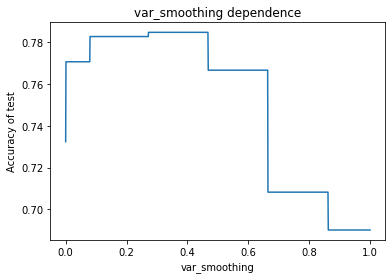

In [ ]:
x_of_var = np.linspace(0 , 1 , 1000)
y_of_var = []

for i in x_of_var:
  y_of_var.append(get_accuracy(i))

plt.plot(x_of_var , y_of_var)
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy of test')
plt.title('var_smoothing dependence')
plt.show()